In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
# from PIL import Image

In [11]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [13]:
from keras.preprocessing.image import load_img, img_to_array
from numpy import asarray
from PIL import Image
x = []
y = []
filenames = (os.listdir("/content/drive/MyDrive/dataset-train/dataset/with_mask"))
for i in filenames:
    photo = load_img("/content/drive/MyDrive/dataset-train/dataset/with_mask/"+i,target_size=(400,400))
    photo = img_to_array(photo)
    x.append(photo)
    y.append(1) # 1 with mask
filenames = (os.listdir("/content/drive/MyDrive/dataset-train/dataset/without_mask"))
for i in filenames:
    photo = load_img("/content/drive/MyDrive/dataset-train/dataset/without_mask/"+i,target_size=(400,400))
    photo = img_to_array(photo)
    x.append(photo)
    y.append(0) # 0 without mask
x = asarray(x)
# for i in os.listdir("/content/drive/MyDrive/dataset-train/dataset/"):
#   for image in os.listdir("/content/drive/MyDrive/dataset-train/dataset/" + i + "/"):
#     path= "/content/drive/MyDrive/dataset-train/dataset/" + i + "/" + image
#     imagePaths.append(path)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
print(x_train.shape, x_test.shape)

(1100, 400, 400, 3) (276, 400, 400, 3)


In [16]:
#convert dependent variable to categorical
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
#normalize data
x_train = x_train/255.0
x_test =  x_test/255.0

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.22))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [19]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
#train model with training set
model_train = model.fit(x_train, y_train, batch_size=64,epochs=4,verbose=1,validation_split=0.20)

Epoch 1/4
14/14 [==============================] - 234s 17s/step - loss: 0.7597 - accuracy: 0.4909 - val_loss: 0.6572 - val_accuracy: 0.4864
Epoch 2/4
14/14 [==============================] - 230s 16s/step - loss: 0.5726 - accuracy: 0.6741 - val_loss: 0.2977 - val_accuracy: 0.9227
Epoch 3/4
14/14 [==============================] - 228s 16s/step - loss: 0.3459 - accuracy: 0.9065 - val_loss: 0.7318 - val_accuracy: 0.8000
Epoch 4/4
14/14 [==============================] - 229s 16s/step - loss: 0.5412 - accuracy: 0.8551 - val_loss: 0.1982 - val_accuracy: 0.9545


In [21]:
import tensorflow as tf
from keras.models import load_model
model.save('maskdetection.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


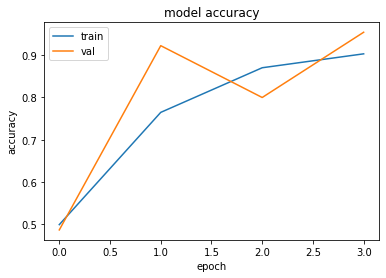

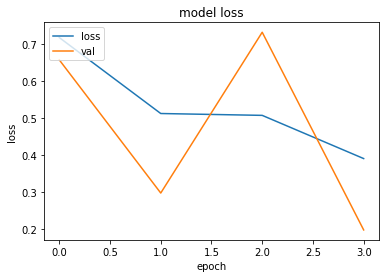

In [22]:
from matplotlib import pyplot as plt
print(model_train.history.keys())
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val'], loc='upper left')
plt.show()